# Exploratory Data Analysis (EDA)

What to Look For:

- **Dataset size:** Do you have enough data? (Generally want 100+ samples).
- **Feature types:** Which columns are numbers vs text/categories?
- **Missing values:** Are there empty cells in your data?
- **Data ranges:** Do the numbers make sense for what they represent?

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


X_train = pd.read_csv('../data/processed/X_train.csv')
y_train = pd.read_csv('../data/processed/y_train.csv')
X_test = pd.read_csv('../data/processed/X_test.csv')
y_test = pd.read_csv('../data/processed/y_test.csv')

## Essential Dataset Overview Steps

In [57]:
# Basic dataset information
print("Dataset Shape:", X_train.shape)  # (rows, columns)
print("Number of features:", len(X_train.columns))
print("Number of samples:", len(X_train))

# Look at the first few rows
print(X_train.head())

# Get basic info about each column
print(X_train.info())

# Basic statistics for numerical columns
print(X_train.describe())

Dataset Shape: (215, 30)
Number of features: 30
Number of samples: 215
      Area  Year  Savanna fires  Forest fires  Crop Residues  \
0  Albania  1990         5.5561        7.0253        59.2391   
1  Albania  1991         5.5561        7.0253        31.4625   
2  Albania  1992         5.5561        7.0253        29.9373   
3  Albania  1993         5.5561        7.0253        44.0550   
4  Albania  1994         5.5561        7.0253        42.4253   

   Rice Cultivation  Drained organic soils (CO2)  Pesticides Manufacturing  \
0           23.5200                     110.5705                       2.0   
1            6.2720                     110.5705                       2.0   
2            1.8816                     110.5705                       2.0   
3            1.0976                     110.5705                       2.0   
4            0.0000                     110.5705                       3.0   

   Food Transport  Forestland  ...  Manure left on Pasture  Manure Manageme

## Quick Quality Checks

In [58]:
# Check for missing values
missing_data = X_train.isnull().sum()
print("Missing values per column:")
print(missing_data[missing_data > 0])

# Check data types
print("\nData types:")
print(X_train.dtypes)

# Look for duplicate rows
duplicates = X_train.duplicated().sum()
print(f"\nDuplicate rows: {duplicates}")

Missing values per column:
Series([], dtype: int64)

Data types:
Area                                object
Year                                 int64
Savanna fires                      float64
Forest fires                       float64
Crop Residues                      float64
Rice Cultivation                   float64
Drained organic soils (CO2)        float64
Pesticides Manufacturing           float64
Food Transport                     float64
Forestland                         float64
Net Forest conversion              float64
Food Household Consumption         float64
Food Retail                        float64
On-farm Electricity Use            float64
Food Packaging                     float64
Agrifood Systems Waste Disposal    float64
Food Processing                    float64
Fertilizers Manufacturing          float64
IPPU                               float64
Manure applied to Soils            float64
Manure left on Pasture             float64
Manure Management               

## Basic target statistics

**What to Look For:**

- Shape of distribution: Is it bell-shaped (normal) or skewed?
- Range: Are the values what you'd expect?
- Outliers: Are there extremely high or low values?
- Zeros or negatives: Do these make sense for your problem?

**Common Target Patterns:**

- Normal distribution: Bell-shaped, mean ≈ median (good for linear models).
- Right-skewed: Long tail on the right, mean > median (common for prices, counts).
- Left-skewed: Long tail on the left, mean < median (less common).
- Bimodal: Two peaks (might indicate two different groups).

In [59]:
print("Target Variable Analysis:")
print(f"Mean: {y_train.mean()}")
print(f"Median: {y_train.median()}")
print(f"Standard Deviation: {y_train.std()}")
print(f"Minimum: {y_train.min()}")
print(f"Maximum: {y_train.max()}")

# Check for missing values in target
print(f"Missing values: {y_train.isnull().sum()}")

Target Variable Analysis:
Mean: Average Temperature °C    0.929502
dtype: float64
Median: Average Temperature °C    0.996417
dtype: float64
Standard Deviation: Average Temperature °C    0.525964
dtype: float64
Minimum: Average Temperature °C   -0.5295
dtype: float64
Maximum: Average Temperature °C    2.021833
dtype: float64
Missing values: Average Temperature °C    0
dtype: int64


## Visualizing your target

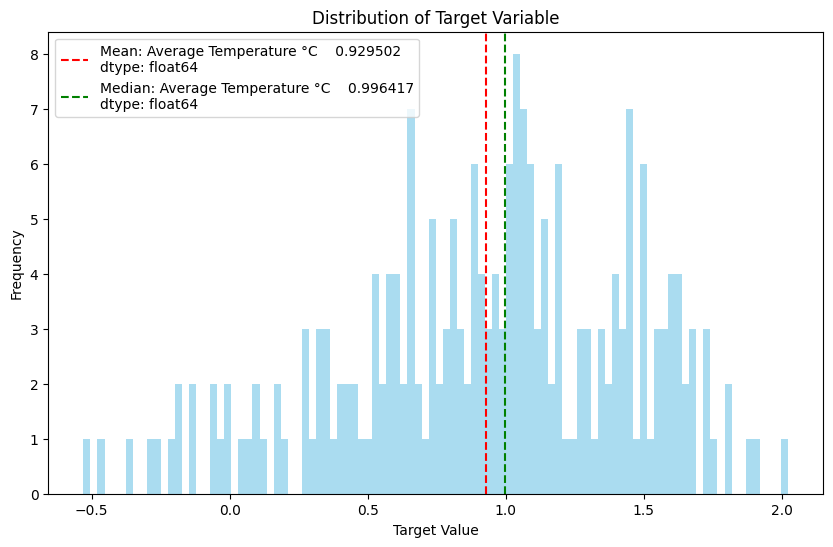

In [60]:
# Create a simple histogram
plt.figure(figsize=(10, 6))
plt.hist(y_train, bins=100, alpha=0.7, color='skyblue')
plt.axvline(y_train['Average Temperature °C'].mean(), color='red', linestyle='--', label=f'Mean: {y_train.mean()}')
plt.axvline(y_train['Average Temperature °C'].median(), color='green', linestyle='--', label=f'Median: {y_train.median()}')
plt.xlabel('Target Value')
plt.ylabel('Frequency')
plt.title('Distribution of Target Variable')
plt.legend()
plt.show()

## Understanding Your Target Variable - What Am I Trying to Predict?

Your target variable is the heart of your regression problem - it's what you're trying to predict. Understanding its distribution, range, and characteristics is crucial because these properties directly influence your choice of algorithms, preprocessing steps, and evaluation metrics.

**Key Target Characteristics to Analyze:**

- **Distribution shape:** Is it bell-shaped (normal), skewed, or has multiple peaks?
- **Range and scale:** What are the minimum, maximum, and typical values?
- **Outliers:** Are there extreme values that might represent errors or special cases?
- **Missing values:** Any gaps in your target that need addressing?

       Average Temperature °C
count                  215.00
mean                     0.93
std                      0.53
min                     -0.53
25%                      0.61
50%                      1.00
75%                      1.36
max                      2.02


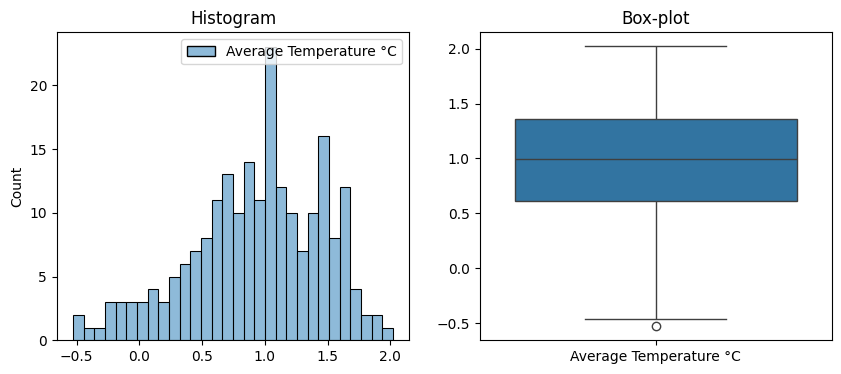

In [61]:
fig, ax = plt.subplots(1,2,figsize=(10,4))
sns.histplot(y_train, ax=ax[0], bins=30); ax[0].set_title("Histogram")
sns.boxplot(y_train, ax=ax[1]);            ax[1].set_title("Box-plot")
print(y_train.describe().round(2))

## Numerical Features – Fast Stats & Distributions

Numeric stats:
                                         mean          std        min  \
Year                                 2001.81         6.58    1990.00   
Savanna fires                          15.76        25.01       0.00   
Forest fires                           23.01        43.67       0.00   
Crop Residues                         330.37       452.52       0.34   
Rice Cultivation                      762.50       937.27       0.00   
Drained organic soils (CO2)           323.09       395.95       0.00   
Pesticides Manufacturing              280.57       463.21       0.00   
Food Transport                       2094.83      3043.91      22.83   
Forestland                          -9369.51     14248.99  -43068.97   
Net Forest conversion                 257.04       714.31       0.00   
Food Household Consumption           2633.62      4056.04       7.91   
Food Retail                          1880.36      2903.77       2.23   
On-farm Electricity Use               721.67    

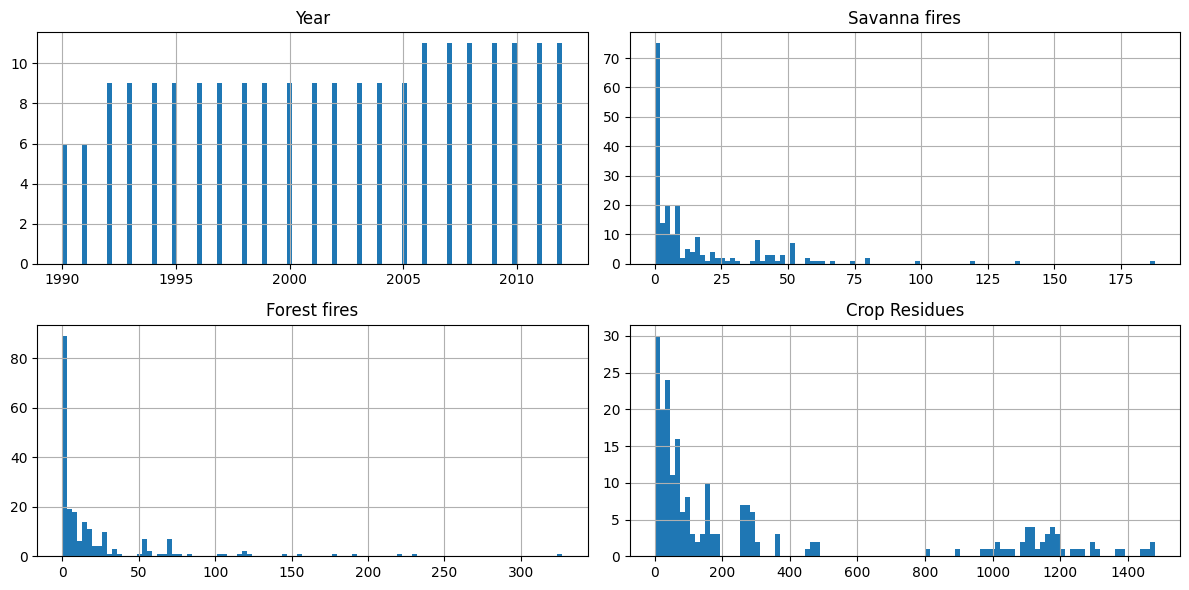

In [63]:
num_cols = X_train.select_dtypes('number').columns
print("Numeric stats:\n", X_train[num_cols].describe().T[['mean','std','min','max']].round(2))
# Plot first 4 histograms*
X_train[num_cols[:4]].hist(bins=100, figsize=(12,6))
plt.tight_layout()
plt.show()

## Numeric ↔ Target Correlation

The correlation between numerical features and your target variable reveals which features are likely to be useful predictors. This analysis helps you prioritize which features to focus on during modeling and identifies potential star performers that might drive your model's success.

**Understanding Correlation Strength:**

- |r| > 0.7: Very strong relationship - likely excellent predictor.
- 0.3 < |r| < 0.7: Moderate relationship - good predictor candidate.
- 0.1 < |r| < 0.3: Weak relationship - might be useful in combination.
- |r| < 0.1: Very weak relationship - consider removing.

Top correlations:
 Drained organic soils (CO2)   -0.260
On-farm Electricity Use       -0.112
Forestland                    -0.081
Manure left on Pasture        -0.079
Rice Cultivation               0.072
dtype: float64


/Users/lukasbals/tomorrow-university/10_regression/sustainability-predictor/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/lukasbals/tomorrow-university/10_regression/sustainability-predictor/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3066: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


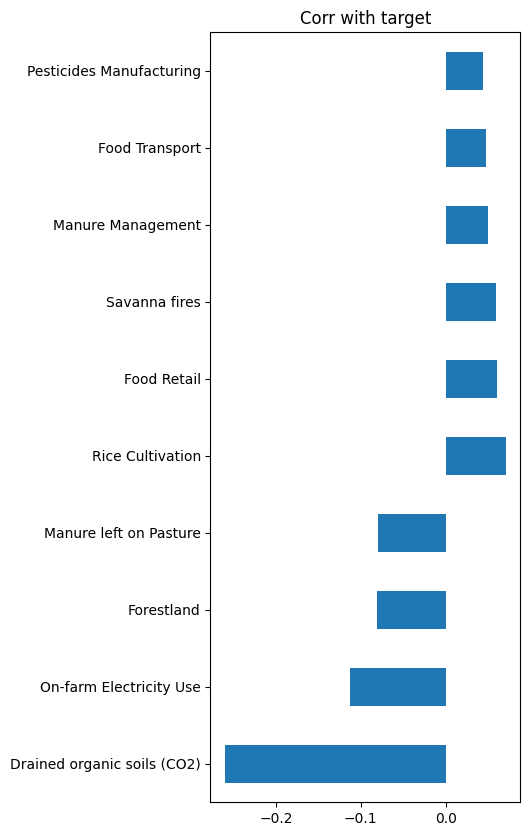

In [73]:
correlations = X_train[X_train.columns.drop('Area').drop('Year')].corrwith(y_train['Average Temperature °C']).sort_values(key=abs, ascending=False)
print("Top correlations:\n", correlations.head(5).round(3))
correlations.head(10).plot.barh(figsize=(4,10)); plt.title("Corr with target"); plt.show()

## Categorical Features – Frequency & Target Mean

**Key Categorical Analysis Elements:**

- **Cardinality:** How many unique categories exist.
- **Frequency distribution:** Which categories are common vs rare.
- **Target differences:** How much the target varies across categories.
- **Missing patterns:** Whether missing categorical data follows any pattern.


Area:
                         count      mean
Area                                   
Albania                    23  0.665554
Greece                     23  0.477746
Italy                      23  0.954257
Malta                      23  0.990025
Portugal                   23  0.976478
Spain                      23  1.006957
Bosnia and Herzegovina     21  0.945611
Croatia                    21  1.018183
Slovenia                   21  1.190202
Montenegro                  7  1.198321
Serbia                      7  1.226750


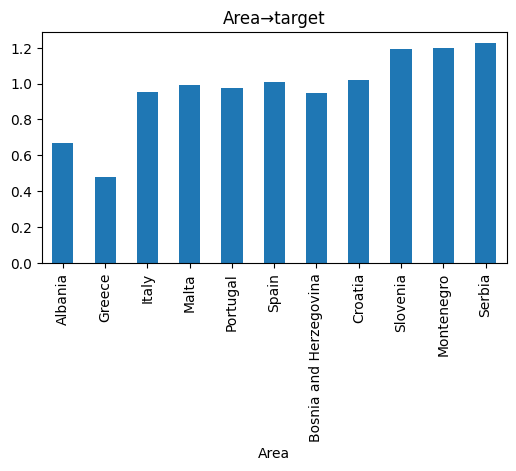

In [74]:
cat_cols = X_train.select_dtypes('object').columns

for col in cat_cols:
    if X_train[col].nunique() <= 500:
        df = X_train.assign(target=y_train)
        summary = df.groupby(col)['target'].agg(['count','mean']).sort_values(by='count', ascending=False)
        print(f"\n{col}:\n", summary)
        summary['mean'].plot.bar(figsize=(6,3)); plt.title(f"{col}→target"); plt.show()

## Missing-Data Map

**Types of Missing Data Patterns:**

- **Random missing:** Scattered gaps with no clear pattern.
- **Systematic missing:** Missing values concentrated in specific rows/columns.
- **Informative missing:** Absence indicates something meaningful (e.g., "income" missing for unemployed people).

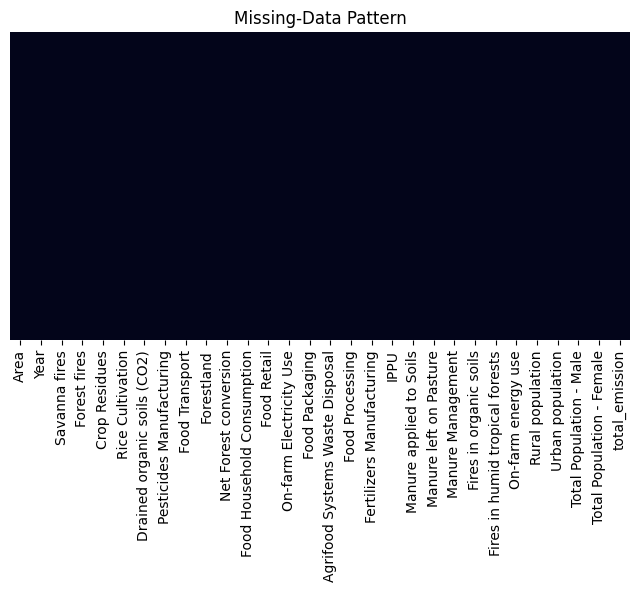

In [75]:
plt.figure(figsize=(8,4))
sns.heatmap(X_train.isnull(), cbar=False, yticklabels=False)
plt.title("Missing-Data Pattern"); plt.show()

# Outlier Detection (IQR Rule)

Why Outliers Matter:

- **Model sensitivity:** Linear models are heavily influenced by extreme values.
- **Scale distortion:** Outliers can make normal data appear compressed.
- **Feature engineering impact:** Scaling and transformation decisions affected by extremes.

In [76]:
def iqr_outliers(s):
    q1,q3=s.quantile([.25,.75]); iqr=q3-q1
    return s[(s<q1-1.5*iqr)|(s>q3+1.5*iqr)]
for col in num_cols[:4]:
    outs = iqr_outliers(X_train[col])
    print(f"{col}: {len(outs)} outliers ({len(outs)/len(X_train)*100:.1f}%)")


Year: 0 outliers (0.0%)
Savanna fires: 25 outliers (11.6%)
Forest fires: 25 outliers (11.6%)
Crop Residues: 46 outliers (21.4%)


## Feature Multicollinearity - Avoiding Redundancy

Why Multicollinearity Matters:

- **Model instability:** Small data changes can cause large coefficient changes.
- **Interpretation difficulty:** Hard to isolate individual feature effects.
- **Computational waste:** Processing redundant information.
- **Overfitting risk:** More parameters than necessary for the same predictive power.

In [77]:
corr_mat = X_train[num_cols].corr().abs()
high_corr = np.where((corr_mat>0.8)&(corr_mat<1.0))
pairs = [(num_cols[i],num_cols[j],corr_mat.iat[i,j]) 
         for i,j in zip(*high_corr) if i<j]
print("High-corr pairs:", pairs[:5])

High-corr pairs: [('Crop Residues', 'Rice Cultivation', np.float64(0.8556710388118774)), ('Crop Residues', 'Pesticides Manufacturing', np.float64(0.8816435366315408)), ('Crop Residues', 'Food Transport', np.float64(0.9519310557691889)), ('Crop Residues', 'Forestland', np.float64(0.8548187411604089)), ('Crop Residues', 'Food Retail', np.float64(0.8392915085651201))]


## EDA Summary Dashboard - Key Insights at a Glance

In [78]:
print("🚀 EDA SNAPSHOT")
print(f"Target skew: {y_train.skew()}")
print("Strongest predictor:", correlations.index[0], correlations.max().round(3))
miss = (X_train.isnull().mean()*100).sort_values(ascending=False).head(3)
print("Top missing cols:\n", miss.round(1))
print("High-corr pairs:", pairs[:3])

🚀 EDA SNAPSHOT
Target skew: Average Temperature °C   -0.464464
dtype: float64
Strongest predictor: Drained organic soils (CO2) 0.072
Top missing cols:
 Area                         0.0
Year                         0.0
Total Population - Female    0.0
dtype: float64
High-corr pairs: [('Crop Residues', 'Rice Cultivation', np.float64(0.8556710388118774)), ('Crop Residues', 'Pesticides Manufacturing', np.float64(0.8816435366315408)), ('Crop Residues', 'Food Transport', np.float64(0.9519310557691889))]
